<a href="https://colab.research.google.com/github/9gl/Machine-Learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%autosave 5

Autosaving every 5 seconds


In [3]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.2


In [4]:
fashion_mnist = keras.datasets.fashion_mnist 
(train_images, train_labels) , (test_images, test_labels)  = fashion_mnist.load_data() 

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ["T-shirt/top","Trouser","Pullover"	,"Dress"	,"Coat"	,"Sandal"	,"Shirt"	,"Sneaker","Bag","Ankle boot"]

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

###Preprocess the data

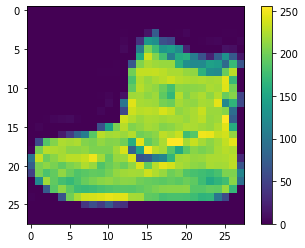

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_images = train_images / 255.0
test_images = test_images / 255.0

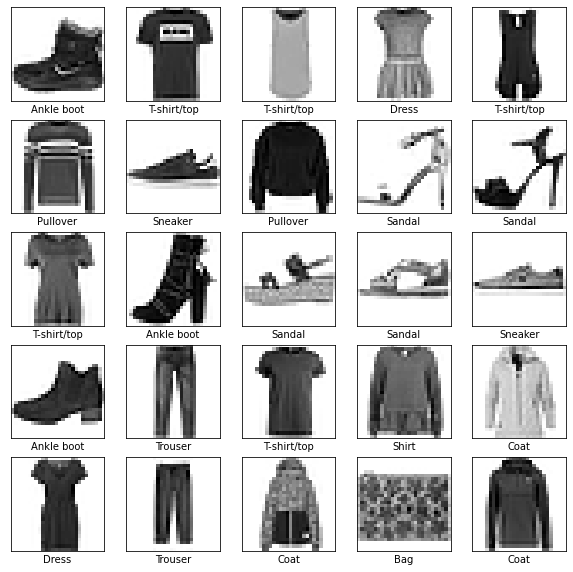

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4923 - accuracy: 0.8270
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3403 - accuracy: 0.8752
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2953 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2798 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2672 - accuracy: 0.8999
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2573 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2466 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [19]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3515 - accuracy: 0.8806 - 550ms/epoch - 2ms/step

Test accuracy: 0.8805999755859375


In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
predictions = probability_model.predict(test_images)

In [22]:
predictions[0]

array([1.1283934e-09, 7.4370649e-12, 5.3131131e-09, 2.2864982e-12,
       1.3971109e-09, 5.5213174e-04, 1.4631944e-08, 3.2767972e-03,
       6.6696239e-11, 9.9617106e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [25]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

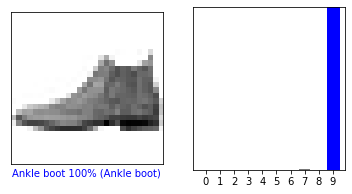

In [26]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

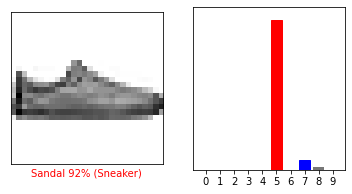

In [27]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

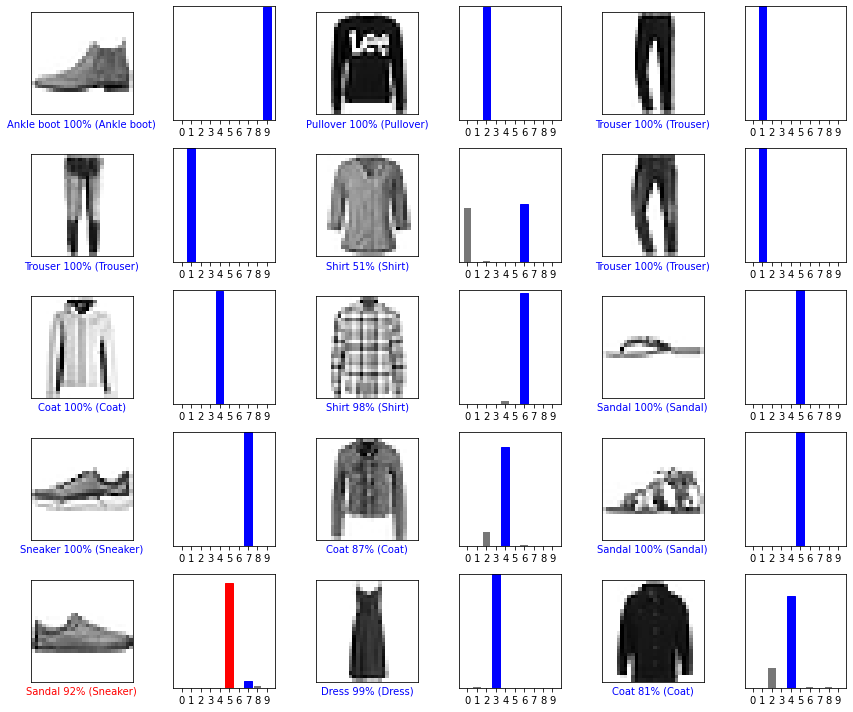

In [28]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()